In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

Using TensorFlow backend.


In [2]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import *
import matplotlib.pyplot as plt

In [3]:
num_classes = 7
img_rows,img_cols = 48,48
batch_size = 32

In [4]:
train_data_dir = 'C:/Users/mmaccari/images/images/train'
validation_data_dir = 'C:/Users/mmaccari/images/images/validation'

In [5]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(img_rows,img_cols),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

Found 28821 images belonging to 7 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            color_mode='grayscale',
                            target_size=(img_rows,img_cols),
                            batch_size=batch_size,
                            class_mode='categorical',
                            shuffle=True)

Found 7066 images belonging to 7 classes.


In [9]:
model = Sequential()

# Block-1

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)       

In [11]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [12]:
# Para guardar el modelo que ha dado mejor rendimiento. Supervisa la pérdida total del modelo ("val_loss")
checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

# Dejar de entrenar cuando una métrica monitoreada haya dejado de mejorar. Patience: luego de 10 epocas sin mejora deja de entrenar
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

#Reducir la tasa de aprendizaje cuando una métrica haya dejado de mejorar.
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [14]:
nb_train_samples = 28821
nb_validation_samples = 7066
epochs=5

In [15]:
history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/5
900/900 [==============================] - 1599s 2s/step - loss: 2.1725 - accuracy: 0.1922 - val_loss: 1.8057 - val_accuracy: 0.2642

Epoch 00001: val_loss improved from inf to 1.80572, saving model to Emotion_little_vgg.h5
Epoch 2/5
900/900 [==============================] - 1341s 1s/step - loss: 1.8237 - accuracy: 0.2416 - val_loss: 1.6618 - val_accuracy: 0.2849

Epoch 00002: val_loss improved from 1.80572 to 1.66178, saving model to Emotion_little_vgg.h5
Epoch 3/5
900/900 [==============================] - 8325s 9s/step - loss: 1.7927 - accuracy: 0.2511 - val_loss: 1.6972 - val_accuracy: 0.2829

Epoch 00003: val_loss did not improve from 1.66178
Epoch 4/5
900/900 [==============================] - 846s 940ms/step - loss: 1.7701 - accuracy: 0.2660 - val_loss: 1.7299 - val_accuracy: 0.2910

Epoch 00004: val_loss did not improve from 1.66178
Epoch 5/5
900/900 [==============================] - 863s 959ms/step - loss: 1.7282 - accuracy: 0.2870 - val_loss: 1.7721 - val_accuracy

In [16]:
Y_pred = model.predict_generator(validation_generator,
nb_validation_samples // batch_size+1)

In [17]:
y_pred = np.argmax(Y_pred, axis=1)
print('Matriz de confusión')
print(confusion_matrix(validation_generator.classes, y_pred))

Matriz de confusión
[[ 146    0    2  160   38   81  533]
 [  18    0    0   17    2    8   66]
 [ 155    0    0  184   33   75  571]
 [ 262    0    1  328   68  135 1031]
 [ 187    0    0  224   50   99  656]
 [ 174    0    3  189   47  100  626]
 [ 128    0    1  161   21   61  425]]


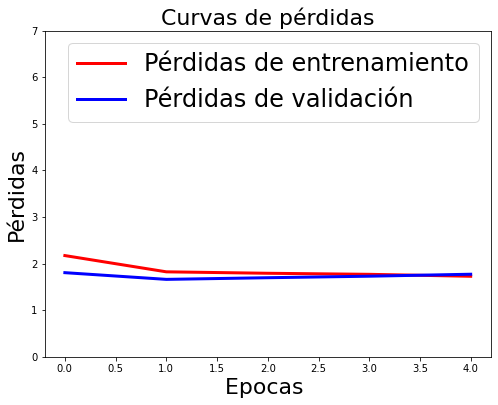

In [20]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Pérdidas de entrenamiento', 'Pérdidas de validación'],
fontsize=24)
plt.xlabel('Epocas ', fontsize=22)
plt.ylabel('Pérdidas', fontsize=22)
plt.ylim(0,7)
plt.title('Curvas de pérdidas', fontsize=22)
plt.show()
